In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Bike Sharing\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.shape

(731, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df['dteday']= pd.to_datetime(df['dteday'])

In [6]:
df['season'] = df['season'].map({1:'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
df['yr'] = df['yr'].map({0: 2011, 1: 2012})
df['weathersit'] = df['weathersit'].map({1:'Clear and Few Clouds', 2:'Mist and Dark Clouds', 3:'Light Snow and Rain', 4:'Heavy Rain and Ice Pallets'})
df['mnth'] = df['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
df['workingday'] = df['workingday'].map({0: 'No', 1:'Yes'})
df['holiday'] = df['holiday'].map({0:'No', 1:'Yes'})

df['hum']= df['hum']*100
df['windspeed']= df['windspeed']*67

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,No,6,No,Mist and Dark Clouds,0.344167,0.363625,80.5833,10.749882,331,654,985
1,2,2011-01-02,springer,2011,January,No,0,No,Mist and Dark Clouds,0.363478,0.353739,69.6087,16.652113,131,670,801
2,3,2011-01-03,springer,2011,January,No,1,Yes,Clear and Few Clouds,0.196364,0.189405,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,springer,2011,January,No,2,Yes,Clear and Few Clouds,0.200000,0.212122,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,springer,2011,January,No,3,Yes,Clear and Few Clouds,0.226957,0.229270,43.6957,12.522300,82,1518,1600


# Data visualization

In [8]:
sns.set(style="whitegrid", color_codes=True)

def add_value_labels(ax, spacing=5):

    # For each bar: Place a label    
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()

        # Determine vertical alignment for positive and negative values
        va = 'bottom' if y >= 0 else 'top'

        # Format the label to one decimal place
        label = int(rect.get_height())    #"{}".format(y)

        # Determine the vertical shift of the label
        # based on the sign of the y value and the spacing parameter
        y_shift = spacing * (1 if y >= 0 else -1)

        # Create the annotation
        ax.annotate(label, (x, y), xytext=(0, y_shift),
                    textcoords="offset points", ha='center', va=va, color='black')

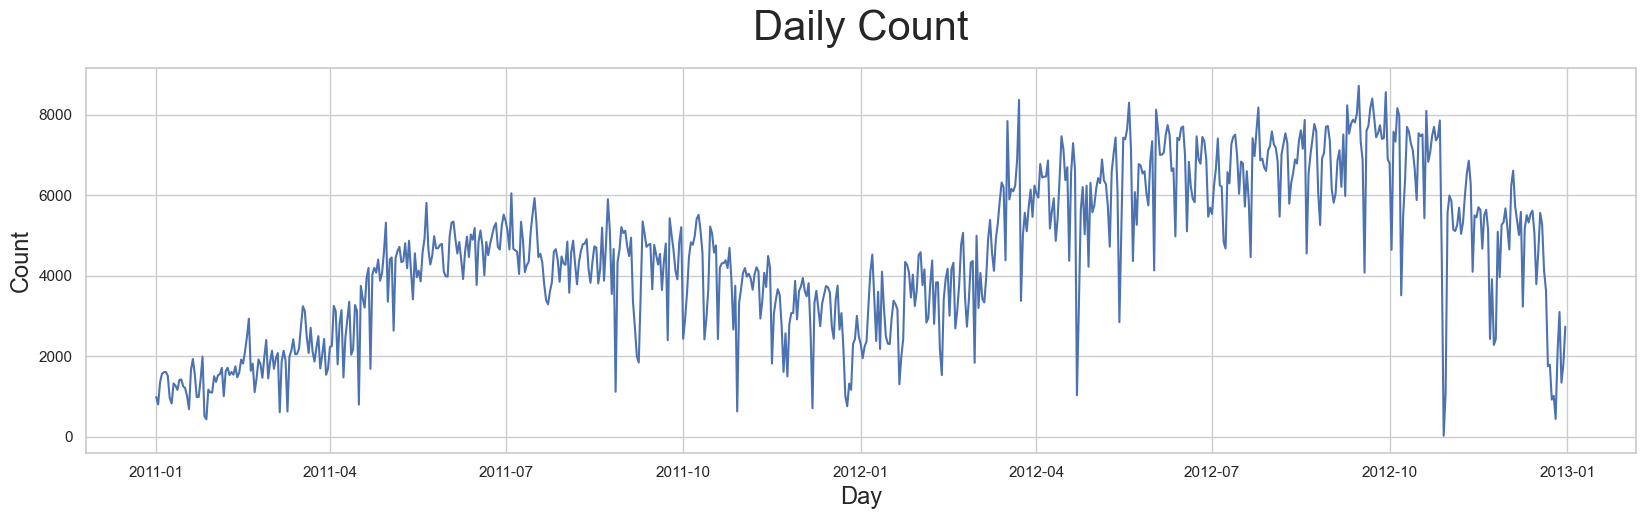

In [9]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df['dteday'], y=df['cnt'])
plt.xlabel('Day', size=17)
plt.ylabel('Count', size=17)
plt.title('Daily Count', size=30, pad=20)
plt.show();

**The count of users started at around 2000 in January 2011 and increased to around 8000 in December 2012. There is a seasonal pattern to the data, with the number of users being higher in the summer and lower in the winter.**

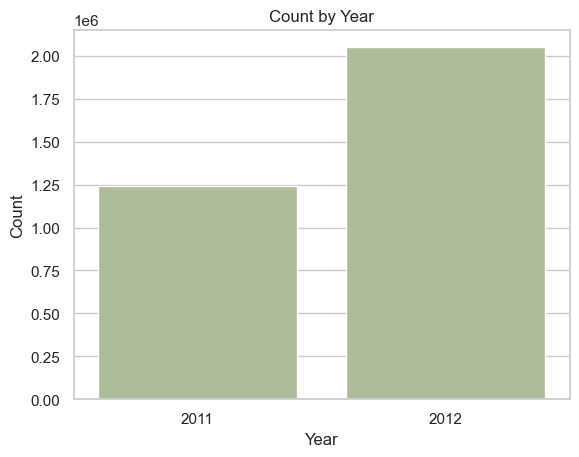

In [10]:
cnt_by_year = df.groupby(['yr'])['cnt'].sum().reset_index()

ax= sns.barplot(cnt_by_year, x='yr', y='cnt', ci=False, palette=['#adc293'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count by Year')
plt.show()

**Number of users in `2012` almost equal twice number of users in `2011`**

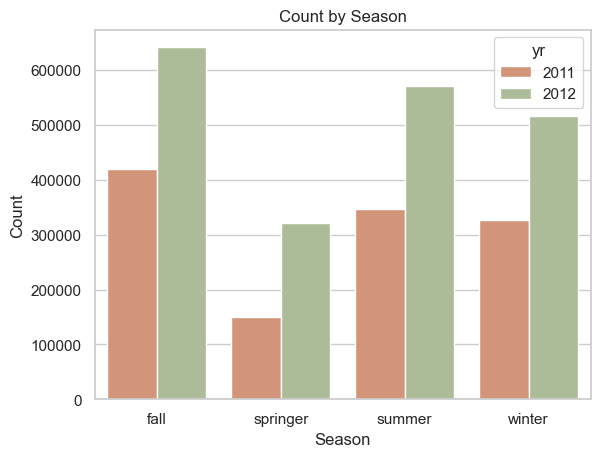

In [11]:
cnt_by_season = df.groupby(['yr','season'])['cnt'].sum().reset_index()

ax=sns.barplot(cnt_by_season, x='season', y='cnt', hue='yr', palette=['#E28F6B', '#adc293'])

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count by Season')
plt.show()

**As seem the most of users use bikes in `fall` season**

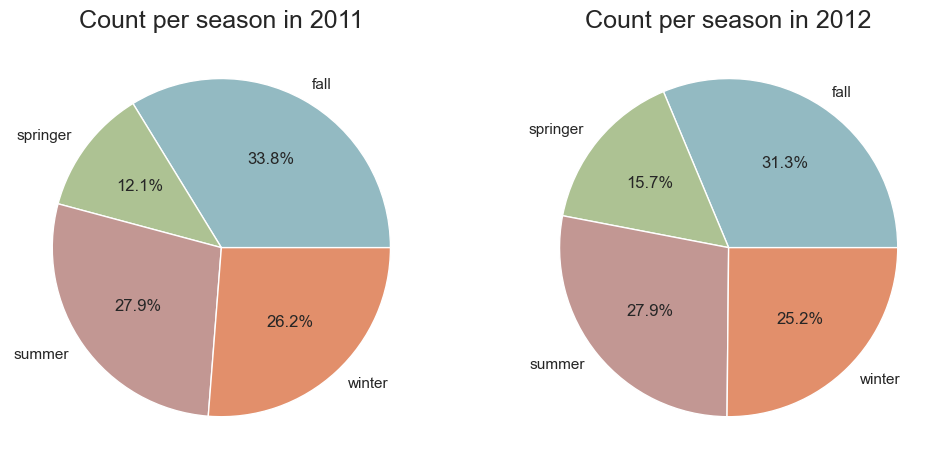

In [12]:
pal = ['#93bac2','#adc293','#c29793', '#E28F6B']# '#76A15A''#838477'

# Plot the pie chart
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1.pie(cnt_by_season[cnt_by_season['yr']==2011]['cnt'], labels=cnt_by_season[cnt_by_season['yr']==2011]['season'],
        autopct='%1.1f%%', colors=pal)
ax1.set_title('Count per season in 2011', fontsize=18)

ax2.pie(cnt_by_season[cnt_by_season['yr']==2012]['cnt'], labels=cnt_by_season[cnt_by_season['yr']==2012]['season'],
        autopct='%1.1f%%', colors=pal)
ax2.set_title('Count per season in 2012', fontsize=18)

plt.show()

**The percentages of users in each season who use bikes in 2012 is almost equal who use bikes in `2011`**

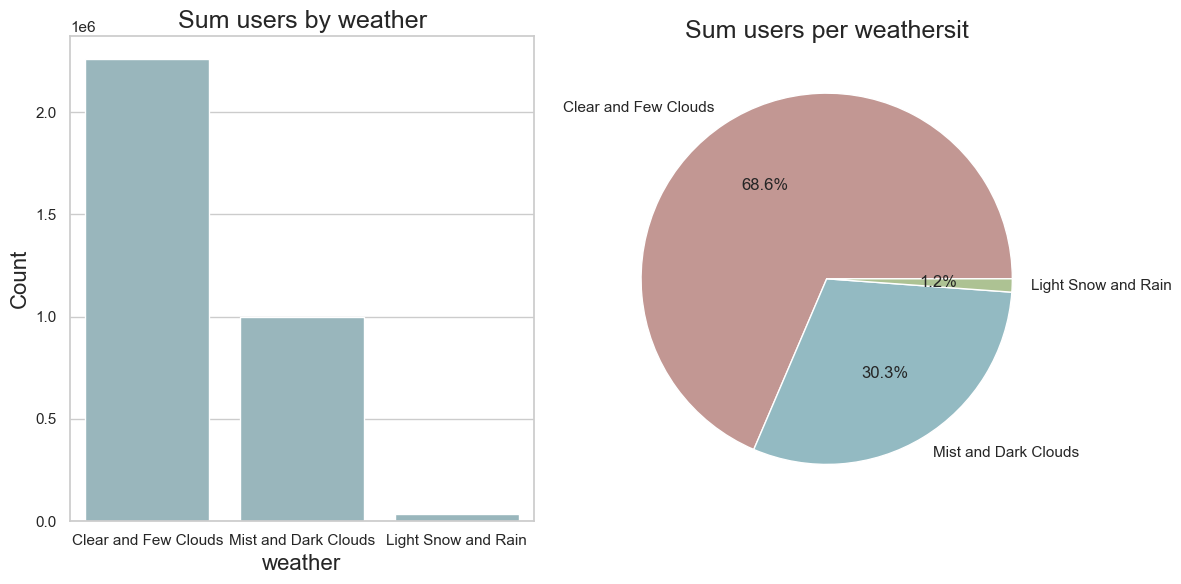

In [13]:
cnt_by_weathersit = df.groupby(['weathersit'])['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the count bar plot
sns.barplot(x='weathersit', y='cnt', data=cnt_by_weathersit, ax=ax1, palette=['#93bac2'])
ax1.set_xlabel('weather', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_title('Sum users by weather', fontsize=18)

# Plot the pie chart
ax2.pie(cnt_by_weathersit['cnt'], labels=cnt_by_weathersit['weathersit'], autopct='%1.1f%%', colors=['#c29793','#93bac2','#adc293'])
ax2.set_title('Sum users per weathersit', fontsize=18)

plt.tight_layout()
plt.show()

**Most of users prefer to use bikes at clear weather and few clouds, opposite the light snow and rain weather** 
**It's rare when it's snowing and raining, so the number of users is almost few, `1.2%` of the total number of users.**

let's check about the weather distribution

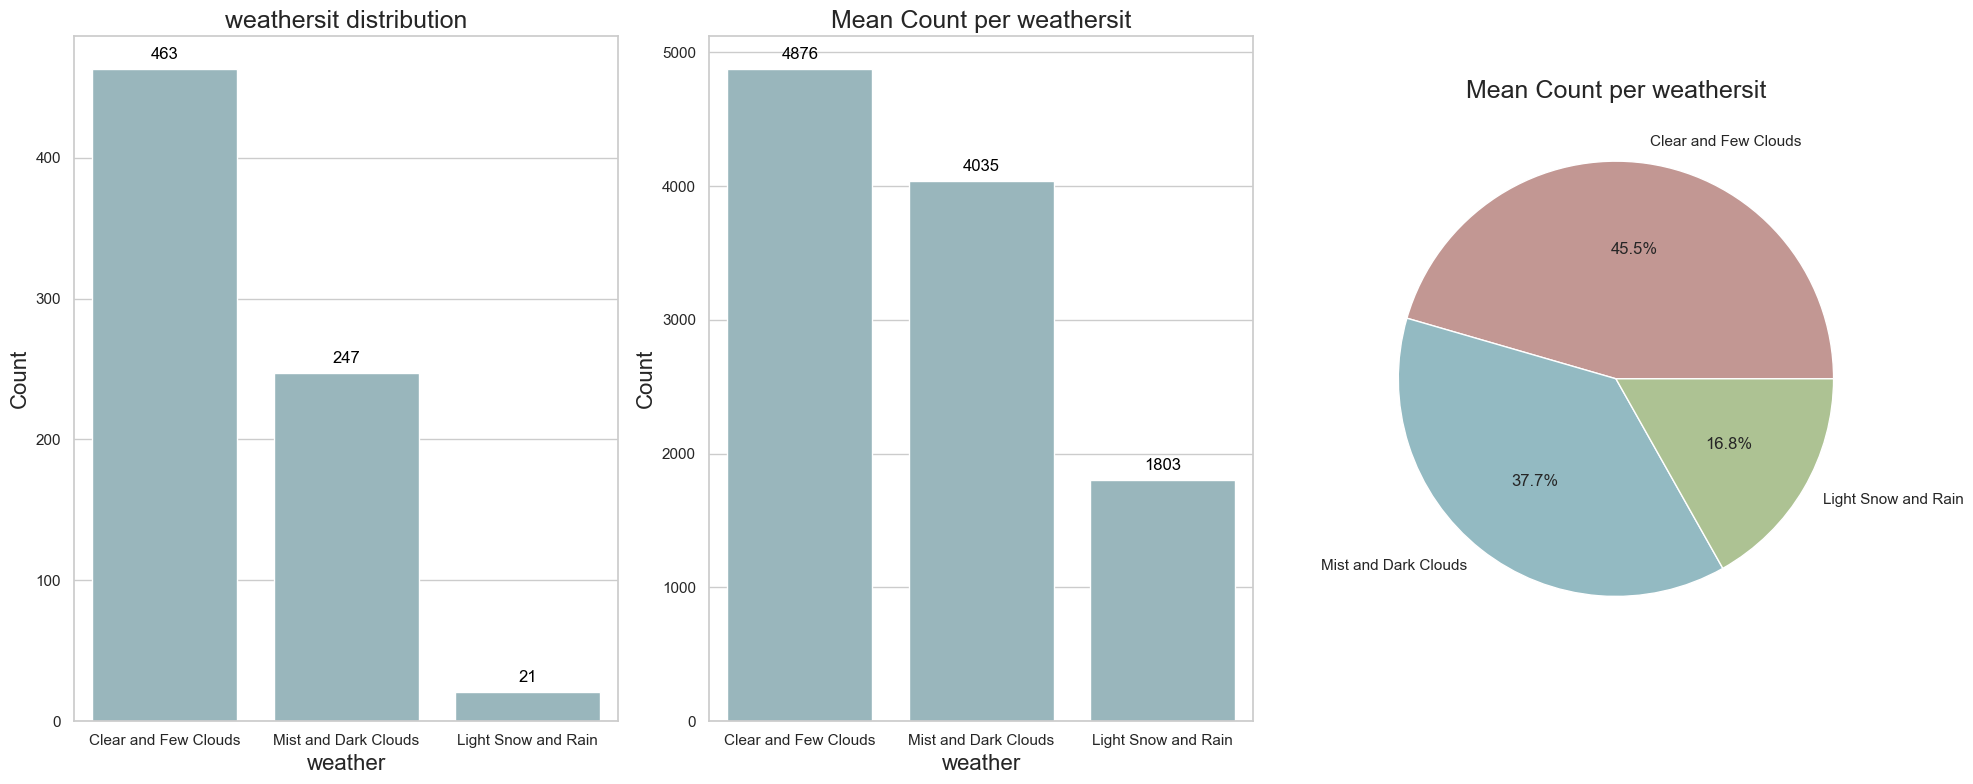

In [14]:
values= df['weathersit'].value_counts()
cnt_per_day= round((df.groupby(['weathersit'])['cnt'].sum()/df.groupby(['weathersit']).size()).reset_index().sort_values(by=0, ascending=False),2)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Plot the count bar plot
sns.barplot(x=values.keys(), y=values.values, ax=ax1, palette=['#93bac2'])
add_value_labels(ax1)

ax1.set_xlabel('weather', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_title('weathersit distribution', fontsize=18)

sns.barplot(y=cnt_per_day[0], x=cnt_per_day['weathersit'], ax=ax2, palette=['#93bac2'])
add_value_labels(ax2)

ax2.set_xlabel('weather', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.set_title('Mean Count per weathersit', fontsize=18)

#Plot the pie chart
ax3.pie(cnt_per_day[0], labels=cnt_per_day['weathersit'], autopct='%1.1f%%', colors=['#c29793','#93bac2','#adc293'])
ax3.set_title('Mean Count per weathersit', fontsize=18)

plt.tight_layout()
plt.show()


**As you see the only `21` day with snowy and rainy weather that expla0in why `1.2%` of the total number of users use bikes in this weather.** 

**But the mean number of users who use bike in snowy and rainy weather is `1803`**

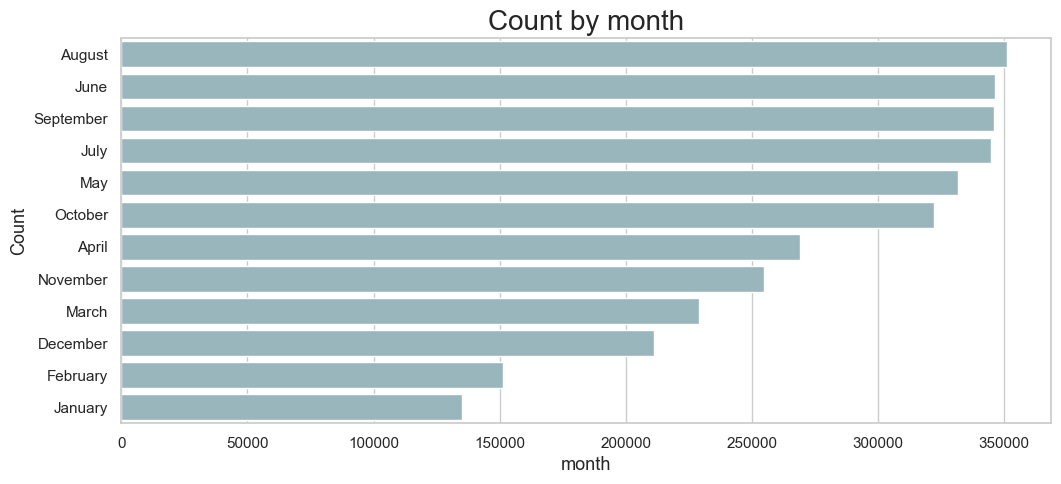

In [15]:
cnt_by_month = df.groupby(['mnth'])['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False )
plt.figure(figsize=(12,5))

ax= sns.barplot(cnt_by_month, x='cnt', y='mnth', ci=False, palette=['#93bac2'])
plt.xlabel('month', size=13)
plt.ylabel('Count', size=13)
plt.title('Count by month', size=20)
plt.show()

**Number of users being higher in the summer when July, septemper and Augest months and lower in the winter when January, february and December months.**

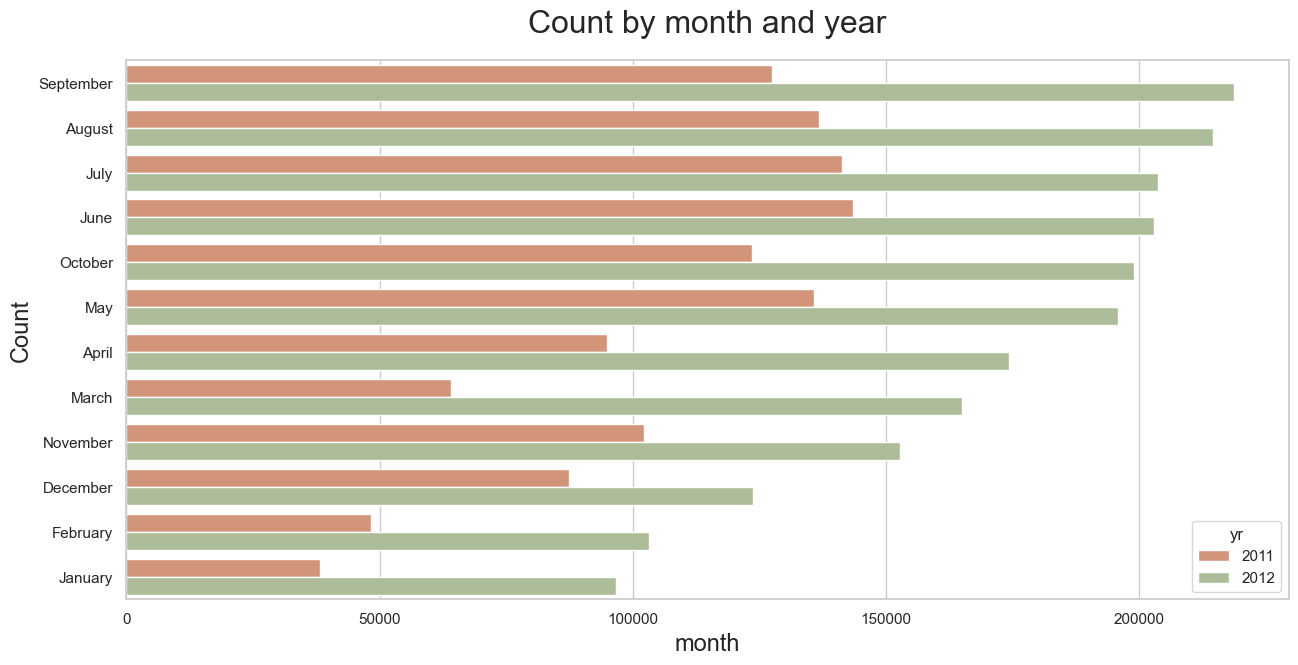

In [16]:
cnt_by_month = df.groupby(['mnth', 'yr'])['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False )

plt.figure(figsize=(15,7))
sns.barplot(x= cnt_by_month['cnt'], y=cnt_by_month['mnth'], hue=cnt_by_month['yr'],
            palette=['#E28F6B', '#adc293'])

plt.xlabel('month', size=17)
plt.ylabel('Count', size=17)
plt.title('Count by month and year', size=23, pad=20)
plt.show()
# Display the combined plot
plt.show()

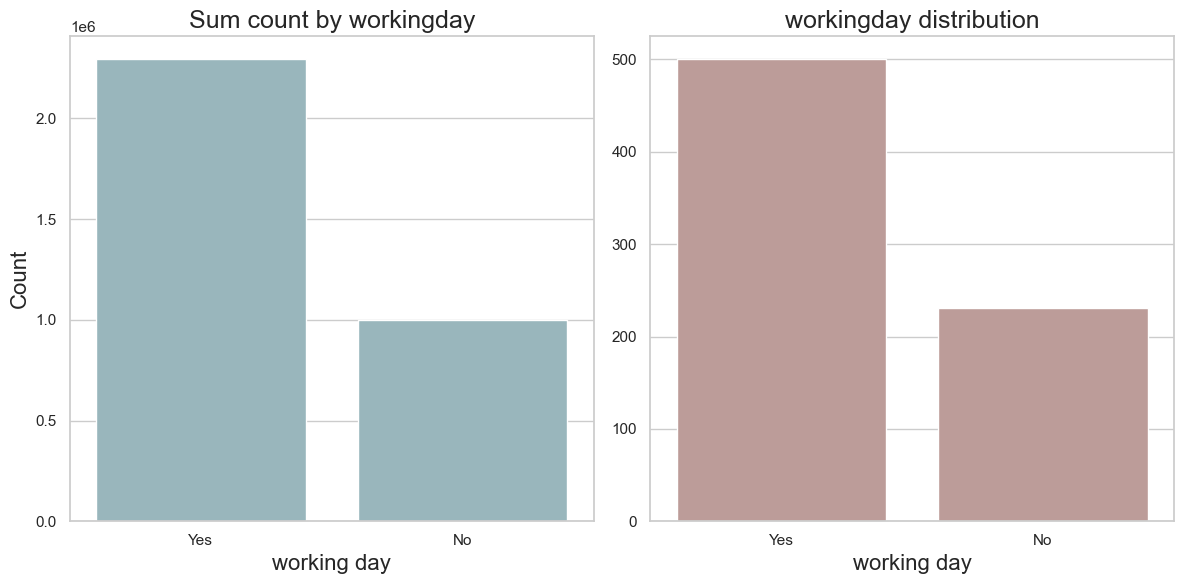

In [17]:
cnt_by_workingday = df.groupby(['workingday'])['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)
values= df['workingday'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the count bar plot
sns.barplot(x='workingday', y='cnt', data=cnt_by_workingday, ax=ax1, palette=['#93bac2'])
ax1.set_xlabel('working day', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_title('Sum count by workingday', fontsize=18)


sns.barplot( x=values.keys(), y= values.values, ax=ax2, palette=['#c29793'])
ax2.set_xlabel('working day', fontsize=16)
ax2.set_title('workingday distribution', fontsize=18)

plt.tight_layout()
plt.show()


**Number of worhing days is almost equal twice number of non-working days that's lead to the sum of users is high in working days.**

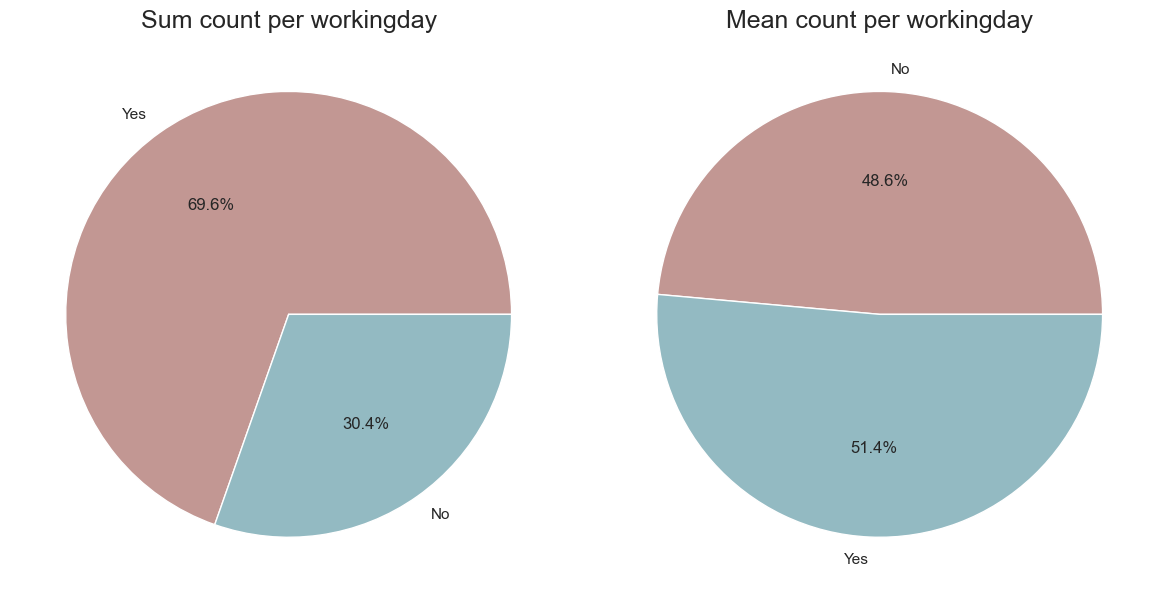

In [18]:
cnt_per_day= round((df.groupby(['workingday'])['cnt'].sum()/df.groupby(['workingday']).size()).reset_index(),2)

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the pie chart
ax1.pie(cnt_by_workingday['cnt'], labels=cnt_by_workingday['workingday'], autopct='%1.1f%%', colors=['#c29793','#93bac2'])
ax1.set_title('Sum count per workingday', fontsize=18)

# Plot the pie chart
ax2.pie(cnt_per_day[0], labels=cnt_per_day['workingday'], autopct='%1.1f%%', colors=['#c29793','#93bac2'])
ax2.set_title('Mean count per workingday', fontsize=18)

plt.tight_layout()
plt.show()

**Number of users doesn't depend on if it is working day or not. The both have almost same count**

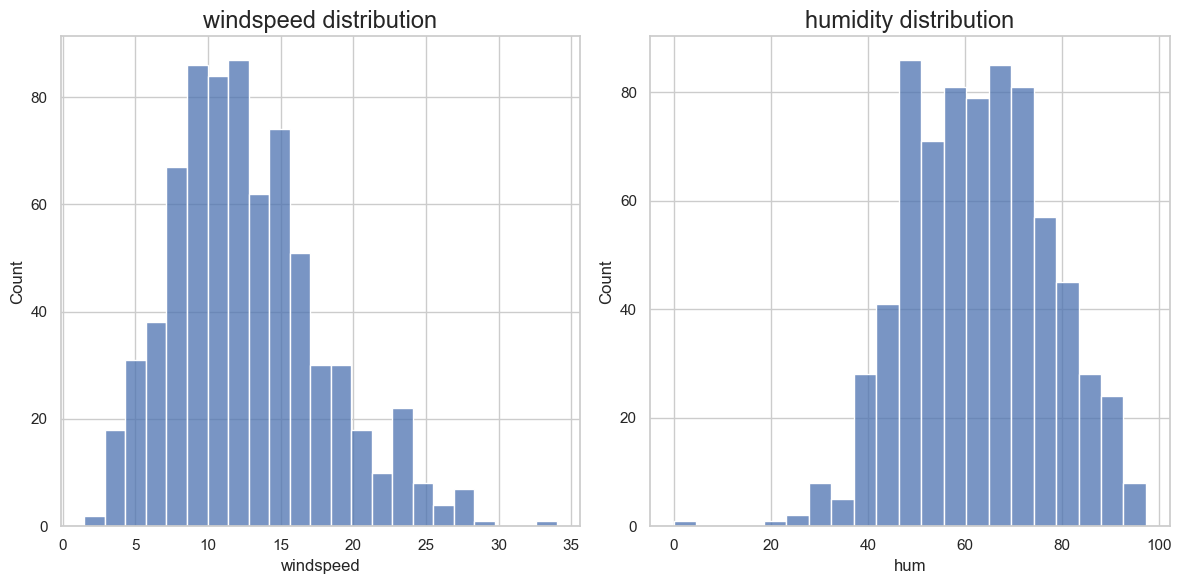

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(df, x='windspeed', ax=ax1)
ax1.set_title('windspeed distribution', size=17)

sns.histplot(df, x='hum', ax=ax2)
ax2.set_title('humidity distribution', size=17)

plt.tight_layout()
plt.show()

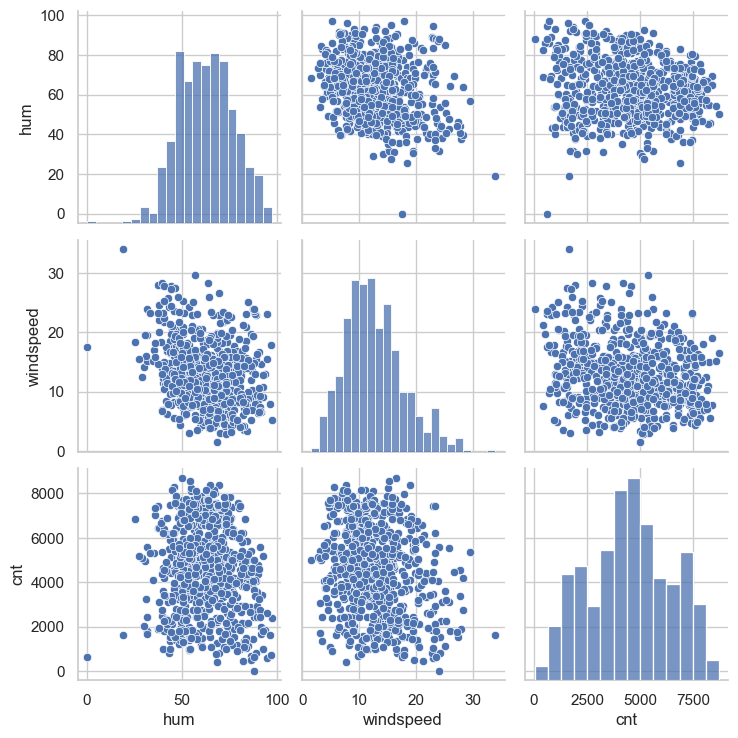

In [20]:
sns.pairplot(df[['hum','windspeed', 'cnt']])
plt.show();

**There is no specific pattern between humidity, wind speed and count of users**

<br>

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>/

<br>


